# Birth death process

Simulate the birth-death process using the method we just taught you. For your first simulation, assume $I_0=50$. $\delta^{-1} = 1$ day, $\mu^{-1} = 0.8$ days.

In [3]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


In [23]:
delta = 1
mu =  1/.8

tmax = 10 
dt = 0.1
times = np.arange(0, tmax+dt, dt)
NumberOfSteps = len(times)

I = np.zeros(NumberOfSteps)
I[0] = 50


Etas=random.randn(NumberOfSteps)


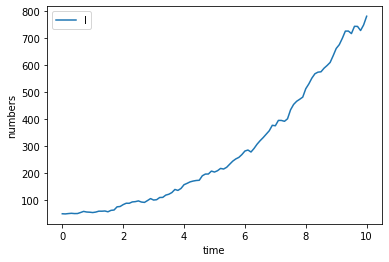

In [30]:

for i in range(NumberOfSteps-1):
    if I[i] <=0:
        I[i] = 0
        break
    a = (mu - delta) * I[i] * dt
    b = (mu + delta) * I[i] * dt
    I[i+1] = I[i] + a + np.sqrt(b) * Etas[i] 


##Once you've created a random walk (or other algorithm) you might want to display it
plt.figure()
plt.plot(times, I, label='I')
plt.xlabel('time')
plt.ylabel('numbers')
plt.legend()
plt.show()


In [10]:
print(I[0:10])

[50.         50.30483955 52.04845409 55.12565054 56.1164869  55.72707376
 52.85044261 55.77341696 52.19837749 60.66024055]
